# Week 11 - P1


In [6]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss
import matplotlib
import thinkstats2
import thinkplot

In [4]:
a_list = [1,2,3,4,5]
another_list = ["a","b","c","d","e"]

a_power_list = [value ** 2 for value in a_list]
print("--------------",a_power_list,"--------------")
filter_even_number = [value**2 for value in a_list if value % 2 == 0]
print("--------------",filter_even_number,"--------------")
print(zip(a_list, another_list))
a_dict = {key:value for value, key in zip(a_list, another_list)}
print("--------------",a_dict,"--------------")


('--------------', [1, 4, 9, 16, 25], '--------------')
('--------------', [4, 16], '--------------')
[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e')]
('--------------', {'a': 1, 'c': 3, 'b': 2, 'e': 5, 'd': 4}, '--------------')


## Scatter plots

I'll start with the data from the BRFSS again.

In [7]:
df = brfss.ReadBrfss(nrows=None)

The following function selects a random subset of a `DataFrame`.

In [8]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html
def SampleRows(df, nrows, replace=False):
    # replace = same row could be chosen more than one or not
    indices = np.random.choice(df.index, nrows, replace=replace)
    print(indices)
    sample = df.loc[indices]
    return sample

I'll extract the height in cm and the weight in kg of the respondents in the sample.

In [10]:
sample = SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2
sample

[213611 107785 132721 ..., 111675 386477 324835]


,age,sex,wtyrago,finalwt,wtkg2,htm3
213611,67.0,1,72.727273,108.100522,72.73,168.0
107785,30.0,2,72.727273,335.632569,89.09,170.0
132721,95.0,2,NaN,215.626580,NaN,NaN
143966,34.0,2,88.181818,149.644700,88.18,165.0
117950,76.0,1,87.272727,337.141581,73.64,180.0
141654,47.0,2,86.363636,177.217172,86.36,155.0
20773,78.0,2,70.454545,183.294247,70.45,165.0
66271,58.0,1,98.636364,2003.041400,85.91,175.0
49004,85.0,2,59.090909,80.762855,59.09,163.0
338669,72.0,2,113.636364,661.767418,113.64,168.0


Here's a simple scatter plot with `alpha=1`, so each data point is fully saturated.

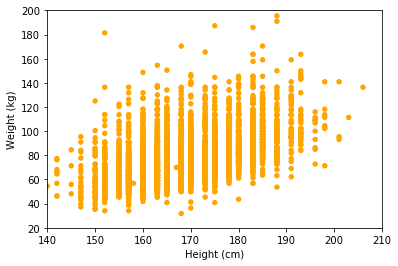

In [13]:
thinkplot.Scatter(heights, weights, alpha=1,color='Orange')
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

The data fall in obvious columns because they were rounded off.  We can reduce this visual artifact by adding some random noice to the data.

NOTE: The version of `Jitter` in the book uses noise with a uniform distribution.  Here I am using a normal distribution.  The normal distribution does a better job of blurring artifacts, but the uniform distribution might be more true to the data.

In [14]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

Heights were probably rounded off to the nearest inch, which is 2.8 cm, so I'll add random values from -1.4 to 1.4.

In [15]:

heights = Jitter(heights, 1.4)
weights = Jitter(weights, 0.5)


And here's what the jittered data look like.

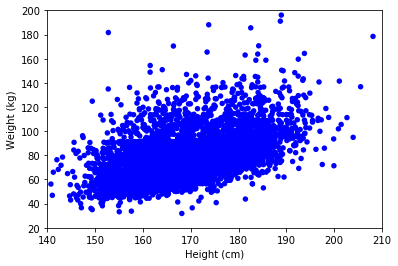

In [16]:
thinkplot.Scatter(heights, weights, alpha=1.0)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

The columns are gone, but now we have a different problem: saturation.  Where there are many overlapping points, the plot is not as dark as it should be, which means that the outliers are darker than they should be, which gives the impression that the data are more scattered than they actually are.

This is a surprisingly common problem, even in papers published in peer-reviewed journals.

We can usually solve the saturation problem by adjusting `alpha` and the size of the markers, `s`.

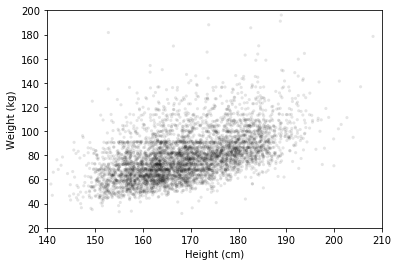

In [18]:
thinkplot.Scatter(heights, weights, alpha=0.1, s=10,color='black')
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

That's better.  This version of the figure shows the location and shape of the distribution most accurately.  There are still some apparent columns and rows where, most likely, people reported their height and weight using rounded values.  If that effect is important, this figure makes it apparent; if it is not important, we could use more aggressive jittering to minimize it. 

An alternative to a scatter plot is something like a `HexBin` plot, which breaks the plane into bins, counts the number of respondents in each bin, and colors each bin in proportion to its count.

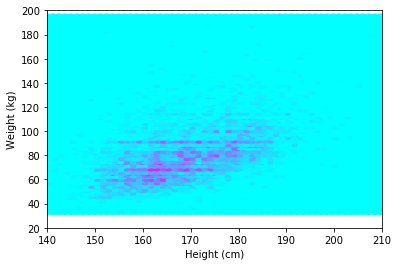

In [20]:
# https://matplotlib.org/examples/color/colormaps_reference.html
thinkplot.HexBin(heights, weights, cmap='cool')
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

In this case the binned plot does a pretty good job of showing the location and shape of the distribution.  It obscures the row and column effects, which may or may not be a good thing.

**Exercise:**  So far we have been working with a subset of only 5000 respondents.  When we include the entire dataset, making an effective scatterplot can be tricky.  As an exercise, experiment with `Scatter` and `HexBin` to make a plot that represents the entire dataset well.

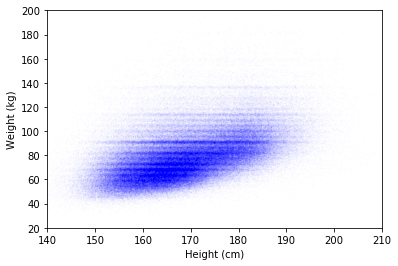

In [23]:
# With smaller markers, I needed more aggressive jittering to
# blur the measurement artifacts

# With this dataset, using all of the rows might be more trouble
# than it's worth.  Visualizing a subset of the data might be
# more practical and more effective.

heights = Jitter(df.htm3, 2.8)
weights = Jitter(df.wtkg2, 1.0)

thinkplot.Scatter(heights, weights, alpha=0.01, s=2)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

## Plotting percentiles

Sometimes a better way to get a sense of the relationship between variables is to divide the dataset into groups using one variable, and then plot percentiles of the other variable.

First I'll drop any rows that are missing height or weight.

In [24]:
cleaned = df.dropna(subset=['htm3', 'wtkg2'])
cleaned

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
5,42.0,1,118.181818,415.161314,109.09,183.0
6,40.0,2,50.000000,422.810541,50.00,157.0
7,24.0,2,131.818182,1280.585980,122.73,178.0
8,37.0,1,87.727273,1245.060440,90.00,178.0
9,65.0,1,77.272727,382.738158,77.27,173.0
10,28.0,1,52.272727,3131.561570,63.64,170.0


Then I'll divide the dataset into groups by height.

In [25]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html
bins = np.arange(135, 210, 5)
print(bins)
indices = np.digitize(cleaned.htm3, bins)
print(indices)
groups = cleaned.groupby(indices)
print(groups)

[135 140 145 150 155 160 165 170 175 180 185 190 195 200 205]
[5 6 8 ..., 9 5 9]


Here are the number of respondents in each group:

In [26]:
for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


Now we can compute the CDF of weight within each group.

In [29]:
mean_heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]
mean_heights


[120.12459016393443,
 135.78508771929825,
 141.43396226415095,
 146.33718778908417,
 151.52843968228584,
 156.3503419942746,
 161.67421045177736,
 166.56972746679975,
 171.40954232482787,
 176.54908086026674,
 181.57596142807944,
 186.32469990536435,
 191.7859712230216,
 196.6426561620709,
 201.73827160493826,
 210.58778625954199]

And then extract the 25th, 50th, and 75th percentile from each group.

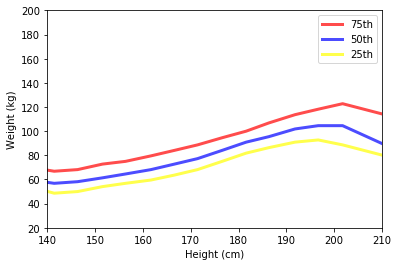

In [30]:
CustomColors = ["red","blue","yellow"]
percent = [75, 50, 25]
for i in range(len(percent)):
    weight_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_heights, weight_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=True)

**Exercise:** Yet another option is to divide the dataset into groups and then plot the CDF for each group.  As an exercise, divide the dataset into a smaller number of groups and plot the CDF for each group.

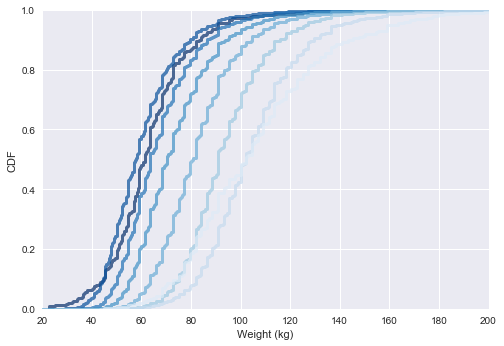

In [18]:

import seaborn as sns
bins = np.arange(140, 210, 10)
indices = np.digitize(cleaned.htm3, bins)
groups = cleaned.groupby(indices)
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

thinkplot.PrePlot(len(cdfs))
thinkplot.Cdfs(cdfs)
thinkplot.Config(xlabel='Weight (kg)',
                 ylabel='CDF',
                 axis=[20, 200, 0, 1],
                 legend=False)

## Correlation

The following function computes the covariance of two variables using NumPy's `dot` function.

In [31]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

And here's an example:

In [32]:
heights, weights = cleaned.htm3, cleaned.wtkg2
Cov(heights, weights)

103.33290857697517

Covariance is useful for some calculations, but it doesn't mean much by itself.  The coefficient of correlation is a standardized version of covariance that is easier to interpret.

In [33]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

The correlation of height and weight is about 0.51, which is a moderately strong correlation.

In [34]:
Corr(heights, weights)

0.50873647897342245

NumPy provides a function that computes correlations, too:

In [35]:
np.corrcoef(heights, weights)

array([[ 1.        ,  0.50873648],
       [ 0.50873648,  1.        ]])

The result is a matrix with self-correlations on the diagonal (which are always 1), and cross-correlations on the off-diagonals (which are always symmetric).

Pearson's correlation is not robust in the presence of outliers, and it tends to underestimate the strength of non-linear relationships.

Spearman's correlation is more robust, and it can handle non-linear relationships as long as they are monotonic.  Here's a function that computes Spearman's correlation:

In [37]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

For heights and weights, Spearman's correlation is a little higher:

In [38]:
SpearmanCorr(heights, weights)

0.54058462623204762

A Pandas `Series` provides a method that computes correlations, and it offers `spearman` as one of the options.

In [26]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

The result is the same as for the one we wrote.

In [27]:
SpearmanCorr(heights, weights)

0.54058462623204573

An alternative to Spearman's correlation is to transform one or both of the variables in a way that makes the relationship closer to linear, and the compute Pearson's correlation.

In [28]:
Corr(cleaned.htm3, np.log(cleaned.wtkg2))

0.53172826059827105

## Exercises

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [39]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [40]:
# Solution

ages = live.agepreg
weights = live.totalwgt_lb
print('Corr', Corr(ages, weights))
print('SpearmanCorr', SpearmanCorr(ages, weights))

Corr 0.0688339703541
SpearmanCorr 0.0946100410966


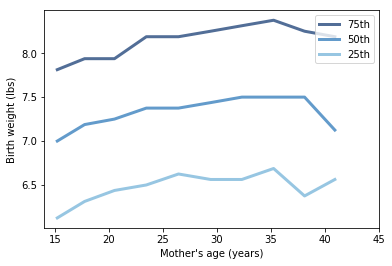

In [41]:
# Solution

def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[14, 45], legend=True)
    
BinnedPercentiles(live)

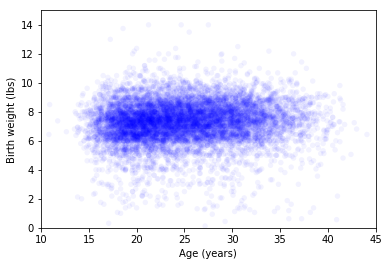

In [44]:
# Solution

def ScatterPlot(ages, weights, alpha=1.0, s=20):
    """Make a scatter plot and save it.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)
    
ScatterPlot(ages, weights, alpha=0.05, s=10)

In [ ]:
# Solution

# My conclusions:

# 1) The scatterplot shows a weak relationship between the variables but
#    it is hard to see clearly.

# 2) The correlations support this.  Pearson's is around 0.07, Spearman's
#    is around 0.09.  The difference between them suggests some influence
#    of outliers or a non-linear relationsip.

# 3) Plotting percentiles of weight versus age suggests that the
#    relationship is non-linear.  Birth weight increases more quickly
#    in the range of mother's age from 15 to 25.  After that, the effect
#    is weaker.